In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("output.csv323.csv.csv")

In [3]:
data.head()

,Unnamed: 0,Address,Lat,Long,Provider
0,0,"Mahindra Park, Uttam Nagar, new delhi",28.68453,77.13497,arcgis
1,1,"Mahipalpur, new delhi",28.54843,77.13636,arcgis
2,2,"ROHINI (NEW DELHI), new delhi",28.73352,77.10403,arcgis
3,3,"New Delhi, new delhi",28.63095,77.21728,arcgis
4,4,"Punjabi Bagh, new delhi",28.66634,77.12524,arcgis


In [4]:
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Address,Lat,Long,Provider
0,0,"Mahindra Park, Uttam Nagar, new delhi",28.68453,77.13497,arcgis
1,1,"Mahipalpur, new delhi",28.54843,77.13636,arcgis
2,2,"ROHINI (NEW DELHI), new delhi",28.73352,77.10403,arcgis
3,3,"New Delhi, new delhi",28.63095,77.21728,arcgis
4,4,"Punjabi Bagh, new delhi",28.66634,77.12524,arcgis


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/ashuposh/myenv/myenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


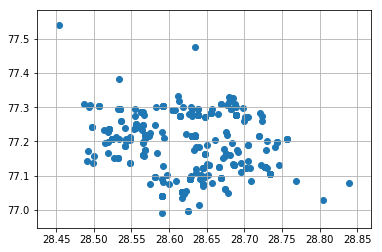

In [17]:
fig=plt.figure(0)
plt.grid("on")
plt.scatter(df['Lat'], df['Long'])
plt.show()
fig.savefig("plot.png", bbox_inches='tight')

In [18]:
df1=pd.DataFrame()
df1=df[['Lat','Long']]
df1.head()

,Lat,Long
0,28.68453,77.13497
1,28.54843,77.13636
2,28.73352,77.10403
3,28.63095,77.21728
4,28.66634,77.12524


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
colmap = {1: 'r', 2: 'g', 3: 'b'}

In [21]:
labels = kmeans.predict(df1)
centroids = kmeans.cluster_centers_

In [22]:
colors = map(lambda x: colmap[x+1], labels)
colors1=list(colors)

/home/ashuposh/myenv/myenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


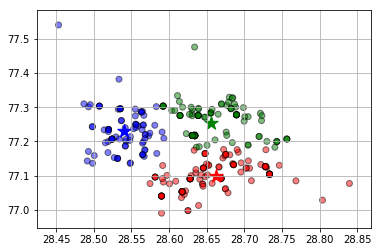

In [23]:
fig=plt.figure(0)
plt.grid("on")

plt.scatter(df1['Lat'], df1['Long'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1], s=200,marker='*')
plt.show()
fig.savefig("plot_center.png", bbox_inches='tight')

In [24]:
import geocoder
for i in range(centroids.shape[0]):
    g = geocoder.osm(list(centroids[i]), method='reverse')
    print(g)


<[OK] Osm - Reverse [Paschim Vihar, West Delhi, Delhi, 110087, India]>
<[OK] Osm - Reverse [Meena Bazaar, Delhi, Central Delhi, Delhi, 100006, India]>
<[OK] Osm - Reverse [Chirag Delhi, Sheikh Sarai, South East Delhi, Delhi, 110048, India]>
